In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from netCDF4 import Dataset
fh = Dataset('/content/drive/MyDrive/geospatial_assignment/sst.mon.mean.nc')

In [ ]:
lon = fh.variables['lon'][:]
lat = fh.variables['lat'][:]
sst = fh.variables['sst'][:]
time = fh.variables['time'][:]

In [ ]:
import numpy as np




#mean_sst = np.zeros((96-84,290-170))

mean_sst = np.mean(sst[:, 84:96, 170:290], axis=0)


mean_sst.shape

(12, 120)

In [ ]:
#Plot data on Basemap taking the Nino 3.4 region ([170:290] for longitude and [84:96] for latitude)
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

def plot_map(lon,lat,data):
    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(fh.variables['lat'][:]), urcrnrlat=np.max(fh.variables['lat'][:]),
            llcrnrlon=np.min(fh.variables['lon'][:]), urcrnrlon=np.max(fh.variables['lon'][:]), )
    m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)

    m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='seismic')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    #m.drawcoastlines()
    plt.title('sst')
    cb.set_label('sst')




    plt.show()
    plt.clf()

ModuleNotFoundError: ignored

In [ ]:
#Plot the mean data over the years for the selected region on Basemap
import numpy as np
plot_map(fh.variables['lon'][170:290],fh.variables['lat'][84:96],mean_sst)

NameError: ignored

In [ ]:
# Prepare sst anomaly (sst value - mean sst value) for the whole dataset as model input
X= sst - np.mean(sst,axis=0)

In [ ]:
nino_3_4_sst_anomaly = np.zeros((1586,96-84,290-170))
nino_3_4_sst_anomaly = X[:, 84:96, 170:290]

'''
for i in range(84,96):
    for j in range(170,290):
        for t in range(1586):
            nino_3_4_sst_anomaly[t][i-84][j-170] = sst.data[t][i][j] - mean_sst[i-84][j-170]
'''
mean_nino_3_4_sst_anomaly = np.mean(nino_3_4_sst_anomaly, axis=(1, 2))
mean_nino_3_4_sst_anomaly = mean_nino_3_4_sst_anomaly - np.mean(mean_nino_3_4_sst_anomaly)


In [ ]:
# Calculate sst anomaly for the nino 3.4 region
#nino_3_4_sst_anomaly=

#calculate spatial mean nino 3.4 sst anomaly for each year
from scipy.signal import detrend


mean_nino_3_4_sst_anomaly_month = np.mean(X[:,84:96,170:290], axis=(1, 2))

'''
for t in range(1586):
    for i in range(84,96):
        for j in range(170,290):
            mean_nino_3_4_sst_anomaly[t] += nino_3_4_sst_anomaly[t][i-84][j-170]
    mean_nino_3_4_sst_anomaly[t]/=(12*120)
'''

#Detrend mean nino 3.4 sst anomaly
dim = mean_nino_3_4_sst_anomaly_month.size//12
mean_nino_3_4_sst_anomaly_month = np.reshape(mean_nino_3_4_sst_anomaly_month[:0 -mean_nino_3_4_sst_anomaly_month.shape[0] % 12],(dim, 12))
mean_nino_3_4_sst_anomaly_year = np.nanmean(mean_nino_3_4_sst_anomaly_month, axis=1)

mean_nino_3_4_sst_anomaly_year= detrend(mean_nino_3_4_sst_anomaly_year)
mean_nino_3_4_sst_anomaly = detrend(mean_nino_3_4_sst_anomaly)
#Plot detrended mean_nino_3_4_sst_anomaly
mean_nino_3_4_sst_anomaly_year

array([ 0.38062982, -0.41518856, -0.42588199, -0.21654642,  0.21098658,
        0.64948098,  0.28276562, -0.34734388,  0.34620601,  0.54875093,
        0.08776435,  0.72613506, -0.05870512,  0.1052141 ,  0.75670385,
       -0.09662   , -0.09270956, -0.34585236, -0.57338145, -0.5683823 ,
        0.03743793,  0.18095568,  0.12663437,  0.53971053,  0.27186667,
       -0.50524889, -0.72783973,  0.30212304,  0.15508116,  0.05931373,
       -0.1056956 , -0.29317075,  0.17105007, -0.40432686,  0.27846352,
        0.24641083, -0.13677884, -0.01802296, -0.00284136,  0.65082783,
        0.26644678,  0.1574462 , -0.50082859, -0.25181281, -0.20708753,
       -0.15737214, -0.09555743, -0.7225482 ,  0.13302107,  0.55937117,
        0.77931151, -0.26337763, -0.25867274,  0.01985428, -0.18819886,
       -0.0634416 , -0.17480738, -0.06897648, -0.49772374, -0.78744871,
        0.32304891,  0.00434586,  0.37319797, -0.53532418, -0.83087574,
       -0.52008654,  0.64023364,  0.48802983, -0.00239774, -0.16

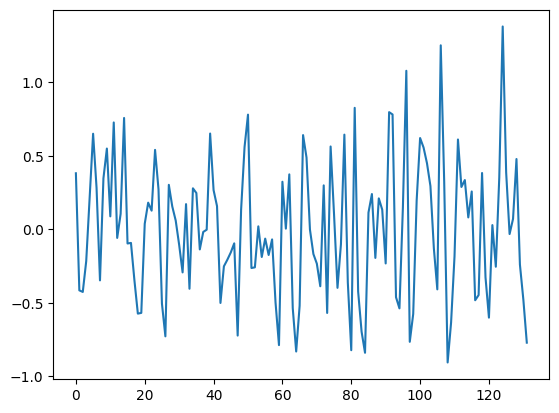

(132,)

In [ ]:
import matplotlib.pyplot as plt

x_axis = [i for i in range(132)]
plt.plot(x_axis,mean_nino_3_4_sst_anomaly_year)
plt.show()

mean_nino_3_4_sst_anomaly_year.shape

In [ ]:
#Prepare labels such that, if mean nino 3.4 sst anomaly value >.5 then 'El-nino' , mean nino 3.4 sst anomaly value <.5 then 'La-nina' and the other values will be discarded. Prepare the corresponding input values also.
def prepare_model_input(mean_nino_3_4_sst_anomaly,X):
    index=[]
    ENSO_label=[]

    for i in range(len(X)):
        if mean_nino_3_4_sst_anomaly[i] > 0.5:
            ENSO_label.append(1)
            index.append(i)
        elif mean_nino_3_4_sst_anomaly[i]<-0.5:
            ENSO_label.append(0)
            index.append(i)





    X=X[index]
    y=ENSO_label
    return (X,y)

In [ ]:
X,y=prepare_model_input(mean_nino_3_4_sst_anomaly,X)

In [ ]:
#Transform masked array into numpy array by replacing nan values by 0.
import math

def transform_masked_array(X):
    X[X.mask]=np.nan
    X[np.isnan(X)] = 0
    return X
X=transform_masked_array(X)

In [ ]:
# Split into training and testing set with test set fraction as .33

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [ ]:
print(len(X_train))
print(len(X_test))

633
313


In [ ]:
#Plot mean training and testing set on map



mean_X_train = np.mean(X_train[:,84:96,170:290], axis=0)

plot_map(fh.variables['lon'][170:290],fh.variables['lat'][84:96],mean_X_train)


NameError: ignored

In [ ]:
#mean_X_test = np.zeros((96-84,290-170))

mean_X_test =  np.mean(X_test[:,84:96,170:290], axis=0)

plot_map(fh.variables['lon'][170:290],fh.variables['lat'][84:96],mean_X_test)

NameError: ignored

In [ ]:
# Define and fit PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 150)
pca.fit(X_train.reshape((X_train.shape[0], -1)))

PCA(n_components=150)

In [ ]:
X_train.shape

(633, 180, 360)

In [ ]:
#Transform training and testing set using PCA
X_train_pca = pca.transform(X_train.reshape((X_train.shape[0], -1)))
X_test_pca = pca.transform(X_test.reshape((X_test.shape[0], -1)))

In [ ]:
X_train_pca.shape

(633, 150)

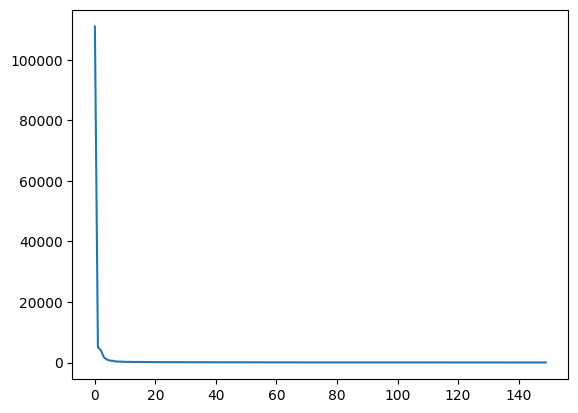

In [ ]:
# Plot explained variance and variance ratio on graph
plt.plot(pca.explained_variance_)
plt.show()

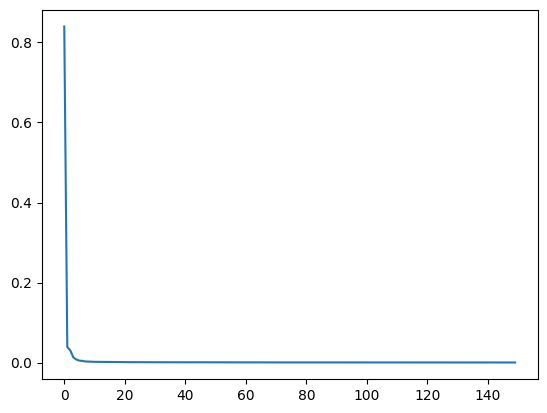

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
from tqdm.notebook import tqdm
import torch
# Create a device variable which will be used to shift model and data to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
# Define pytorch NN classifier which reflects highest testing accuracy(around .99) with minimum number of layers.
from collections import OrderedDict
class Neural_network(torch.nn.Module):
    def __init__(self, params):
        super(Neural_network, self).__init__()

        self.params = params
        self.layer_dict = OrderedDict()

        for i in range(len(self.params) - 1):
            self.layer_dict['fc' + str(i)] = torch.nn.Linear(self.params[i], self.params[i + 1])
            self.layer_dict['relu' + str(i)] = torch.nn.ReLU()

        self.model = torch.nn.Sequential(self.layer_dict)

    def forward(self, x):
        return self.model(x)

In [ ]:
# First create a pytorch dataset from the numpy data

train_pytorch_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_train_pca).float(), torch.from_numpy(np.array(y_train)).long())
test_pytorch_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_test_pca).float(), torch.from_numpy(np.array(y_test)).long())

In [ ]:
# Create a dataloader object which will create batches of data

def make_batches(train_dataset, test_dataset, batch_size):
    train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

In [ ]:
# Train the classifier

def train_classifier(model, n_epochs, batch_size, learning_rate, optim):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim(model.parameters(), lr=learning_rate)

    train_loader, test_loader = make_batches(train_pytorch_dataset,test_pytorch_dataset,batch_size)

    training_loss = []
    test_loss = []
    training_accuracy = []
    test_accuracy = []

    for i in range(n_epochs):
        train_corr = 0
        test_corr = 0

        for j, (X_train, y_train) in enumerate(train_loader):
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)
            predicted = torch.max(y_pred.data, 1)[1]
            batch_corr = (predicted == y_train).sum()
            train_corr += batch_corr
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        training_loss.append(loss.item())
        training_accuracy.append(train_corr*100/X_train_pca.shape[0])

        with torch.no_grad():
            for j, (X_test, y_test) in enumerate(test_loader):
                y_val = model(X_test)
                predicted = torch.max(y_val.data, 1)[1]
                test_corr += (predicted == y_test).sum()

        loss = criterion(y_val, y_test)
        test_loss.append(loss.item())
        test_accuracy.append(test_corr*100/X_train_pca.shape[0])


    return model, training_loss, test_loss, training_accuracy, test_accuracy

In [ ]:
model, training_loss, test_loss, training_accuracy, test_accuracy = train_classifier(Neural_network([150, 75, 35, 15, 2]),n_epochs=500,batch_size=64,learning_rate=0.001,optim=torch.optim.SGD)

In [ ]:
import copy

n_epochs=500
batch_sizes = [16, 32, 64, 128]
learning_rates = [0.001, 0.002, 0.003, 0.01, 0.02, 0.03]
optimizer_ls = [torch.optim.Adam, torch.optim.SGD]
best_accuracy = -100000
best_model = None
best_batch_size = None
best_learning_rate = None
best_optimizer = None


for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for opt in optimizer_ls:

            model = Neural_network([150, 75, 35, 15, 2]).to(device)
            model, training_loss, test_loss,train_accuracy, test_acc = train_classifier(model, n_epochs ,batch_size,learning_rate,opt)

            if best_accuracy < test_acc[-1]:
                best_accuracy = test_acc[-1]
                best_model = model
                best_batch_size = batch_size
                best_learning_rate = learning_rate
                best_optimizer = opt


In [ ]:
print(best_accuracy)
print(best_batch_size)
print(best_learning_rate)
print(best_optimizer)

tensor(49.4471)
16
0.001
<class 'torch.optim.sgd.SGD'>


In [ ]:
from sklearn.metrics import confusion_matrix


TypeError: ignored

In [ ]:
#randomly select 5 maps from testing set, plot them on map, predict classes using their PCA data and report them along with their true label.


random_maps = np.random.randint(0,len(test_pytorch_dataset),5)

for i in range(5):
    data, label = test_pytorch_dataset[random_maps[i]]
    pred = model(data.unsqueeze(0).to(device)).cpu().detach().numpy()[0]
    pred = np.argmax(pred)
    plot_map(lon[170:290],lat[84:96],X_test[random_maps[i],84:96,170:290])

NameError: ignored